In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

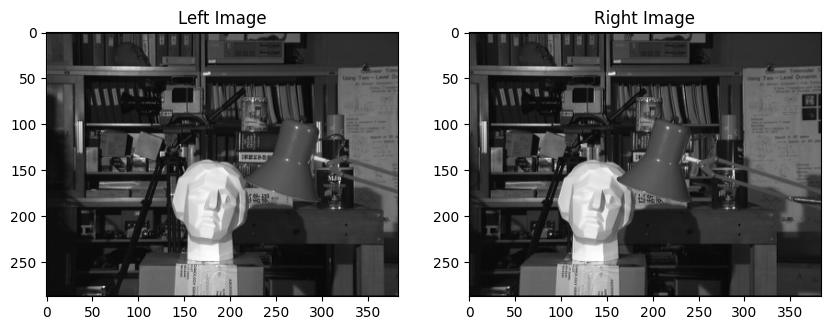

In [23]:
tsukuba_left = cv2.imread('tsukuba_left.png')
tsukuba_right = cv2.imread('tsukuba_right.png')

gray_tsukuba_left = cv2.cvtColor(tsukuba_left, cv2.COLOR_RGB2GRAY)
gray_tsukuba_right = cv2.cvtColor(tsukuba_right, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray_tsukuba_left, cmap='gray')
plt.title('Left Image')
plt.subplot(1,2,2)
plt.imshow(gray_tsukuba_right, cmap='gray')
plt.title('Right Image')
plt.show()

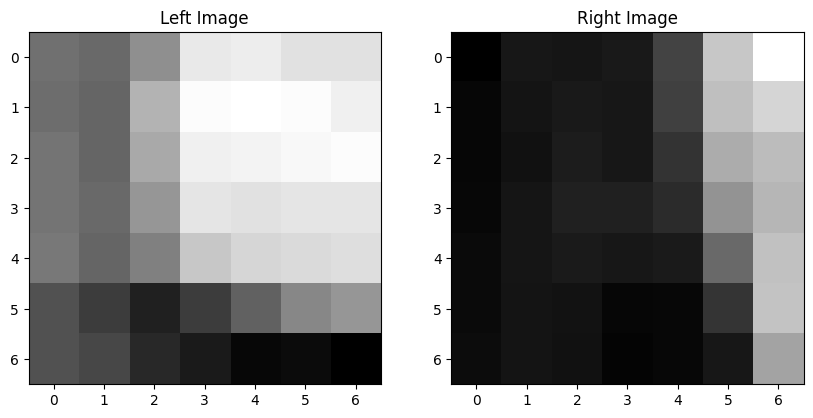

In [24]:
nose_left = cv2.imread('nose_left.png')
nose_right = cv2.imread('nose_right.png')

gray_nose_left = cv2.cvtColor(nose_left, cv2.COLOR_RGB2GRAY)
gray_nose_right = cv2.cvtColor(nose_right, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray_nose_left, cmap='gray')
plt.title('Left Image')
plt.subplot(1,2,2)
plt.imshow(gray_nose_right, cmap='gray')
plt.title('Right Image')
plt.show()

In [25]:
def compute_sad(imageA, imageB):
    return np.sum(np.abs(imageA.astype(np.int32) - imageB.astype(np.int32)))

def compute_ssd(imageA, imageB):
    return np.sum((imageA.astype(np.int32) - imageB.astype(np.int32))**2)

SAD = compute_sad(gray_nose_left, gray_nose_right)
SSD = compute_ssd(gray_nose_left, gray_nose_right)
print(f'Sum of Absolute Differences (SAD) between nose left and right images: {SAD}')
print(f'Sum of Squared Differences (SSD) between nose left and right images: {SSD}')

Sum of Absolute Differences (SAD) between nose left and right images: 7657
Sum of Squared Differences (SSD) between nose left and right images: 1274699


In [26]:
nose_images = ["nose_left.png", "nose_right.png", "nose1.png", "nose2.png", "nose3.png"]
gray_images = [cv2.cvtColor(cv2.imread(img), cv2.COLOR_RGB2GRAY) for img in nose_images]

sad_list_compared_to_nose_left = [compute_sad(gray_images[0], img) for img in gray_images[1:]]
smallest_sad_index = np.argmin(sad_list_compared_to_nose_left) + 1
print(f'The image most similar to nose_left is: {nose_images[smallest_sad_index]} with SAD value: {sad_list_compared_to_nose_left[smallest_sad_index - 1]}')

The image most similar to nose_left is: nose2.png with SAD value: 119


Best match for nose_left in nose_span starts at column: 132


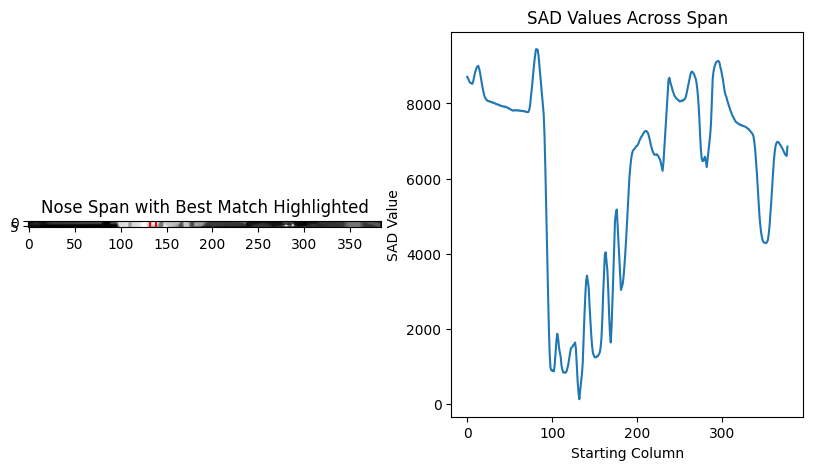

In [ ]:
def find_best_match_along_row(span, template, zero_mean: bool = False):

    Hs, Ws = span.shape
    Ht, Wt = template.shape
    assert Hs == Ht, f"Row heights must match. span={Hs}, template={Ht}"

    max_x = Ws - Wt
    if max_x < 0:
        raise ValueError("Template wider than span. Check your inputs.")

    # optional normalization once for template
    if zero_mean:
        tpl = template.astype(np.int32) - int(template.mean())
    else:
        tpl = template

    sad_values = np.empty(max_x + 1, dtype=np.int64)

    for x in range(max_x + 1):
        win = span[:, x:x+Wt]
        if zero_mean:
            win_proc = win.astype(np.int32) - int(win.mean())
            sad_values[x] = np.abs(win_proc - tpl).sum()
        else:
            sad_values[x] = compute_sad(win, tpl)

    best_x = int(np.argmin(sad_values))
    return best_x, sad_values

nose_span = cv2.imread('nose_span.png')
gray_nose_span = cv2.cvtColor(nose_span, cv2.COLOR_RGB2GRAY)
best_x, sad_values = find_best_match_along_row(gray_nose_span, gray_nose_left, zero_mean=False)
print(f'Best match for nose_left in nose_span starts at column: {best_x}')
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray_nose_span, cmap='gray')
plt.axvline(x=best_x, color='r', linestyle='--')
plt.axvline(x=best_x + gray_nose_left.shape[1], color='r', linestyle='--')
plt.title('Nose Span with Best Match Highlighted')
plt.subplot(1,2,2)
plt.plot(sad_values)
plt.title('SAD Values Across Span')
plt.xlabel('Starting Column')
plt.ylabel('SAD Value')
plt.show()
